# ECE 57000 Assignment 4 Exercise

Your Name: Nikita Ravi

## Exercise 0: Train your model on GPU (0 points)

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models


For some tasks in this assignment, it can take a long time if you run it on CPU. For example, based on our test on Exercise 3 Task 4, it will take roughly 2 hours to train the full model for 1 epoch on CPU. Hence, we highly recommend you try to train your model on GPU.

To do so, first you need to enable GPU on Colab (this will restart the runtime). Click `Runtime`-> `Change runtime type` and select the `Hardware accelerator` there.  You can then run the following code to see if the GPU is correctly initialized and available.



In [ ]:
print(f'Can I can use GPU now? -- {torch.cuda.is_available()}')

Can I can use GPU now? -- True


### You must manually move your model and data to the GPU (and sometimes back to the cpu)
After setting the GPU up on colab, then you should put your **model** and **data** to GPU. We give a simple example below. You can use `to` function for this task. See [torch.Tensor.to](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) to move a tensor to the GPU (probably your mini-batch of data in each iteration) or [torch.nn.Module.to](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.to) to move your NN model to GPU (assuming you create subclass [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)). Note that `to()` of tensor returns a NEW tensor while `to` of a NN model will apply this in-place. To be safe, the best semantics are `obj = obj.to(device)`. For printing, you will need to move a tensor back to the CPU via the `cpu()` function.

Once the model and input data are on the GPU, everything else can be done the same.  This is the beauty of PyTorch GPU acceleration.  None of the other code needs to be altered.

To summarize, you need to 1) enable GPU acceleration in Colab, 2) put the model on the GPU, and 3) put the input data (i.e., the batch of samples) onto the GPU using `to()` after it is loaded by the data loaders (usually you only put one batch of data on the GPU at a time).

In [ ]:
rand_tensor = torch.rand(5,2)
simple_model = nn.Sequential(nn.Linear(2,10), nn.ReLU(), nn.Linear(10,1))
print(f'input is on {rand_tensor.device}')
print(f'model parameters are on {[param.device for param in simple_model.parameters()]}')
print(f'output is on {simple_model(rand_tensor).device}')

device = torch.device('cuda')
# ----------- <Your code> ---------------
# Move rand_tensor and model onto the GPU device
rand_tensor = rand_tensor.to(device)
simple_model = simple_model.to(device)



# --------- <End your code> -------------
print(f'input is on {rand_tensor.device}')
print(f'model parameters are on {[param.device for param in simple_model.parameters()]}')
print(f'output is on {simple_model(rand_tensor).device}')

input is on cpu
model parameters are on [device(type='cpu'), device(type='cpu'), device(type='cpu'), device(type='cpu')]
output is on cpu
input is on cuda:0
model parameters are on [device(type='cuda', index=0), device(type='cuda', index=0), device(type='cuda', index=0), device(type='cuda', index=0)]
output is on cuda:0


## Exercise 1: Why use a CNN rather than only fully connected layers? (30 points)

In this exercise, you will build two models for the **MNIST** dataset: one uses only fully connected layers and another uses a standard CNN layout (convolution layers everywhere except the last layer is fully connected layer). The two models should be built with roughly the same accuracy performance, your task is to compare the number of network parameters (a huge number of parameters can affect training/testing time, memory requirements, overfitting, etc.).

### Task 1: Following the structure used in the instructions, you should create

*   One network named **OurFC** which should consist with only fully connected layers

  *   You should decide how many layers and how many hidden dimensions you want in your network 
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   There is no need to make the neural network unnecessarily complex, your total training time should no longer than 3 mins

*   Another network named **OurCNN** which applys a standard CNN structure
  *   Again, you should decide how many layers and how many channels you want for each layer.
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   A standard CNN structure can be composed as **[Conv2d, MaxPooling, ReLU] x num_conv_layers + FC x num_fc_layers**

* Train and test your network on MNIST data as in the instructions
* You are **required** to print out the loss in the training and loss+accuracy in the test as in the instructions.

In [ ]:
def train(classifier, epoch):
  classifier.train()

  for batch_idx, (images, targets) in enumerate(train_loader):
    optimizer.zero_grad()
    output = classifier(images)
    loss = F.nll_loss(output, targets)
    loss.backward()
    optimizer.step()

def test(classifier, epoch):
  classifier.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      prediction = output.data.max(1, keepdim=True)[1]
      correct += prediction.eq(targets.data.view_as(prediction)).sum()
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = torchvision.datasets.MNIST('./', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('./', train=False, download=True, transform=transform)

print(train_dataset)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
batch_size_train, batch_size_test = 64, 1000

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)

print(train_loader)

In [ ]:
# ----------- <Your code> ---------------
class OurFC(nn.Module):
  def __init__(self):
    super(OurFC, self).__init__()
    
    self.fc = nn.Linear(28*28, 20)    

  def forward(self, x):
    x = x.view(-1, 28*28)      
    x = F.relu(self.fc(x))
    return F.log_softmax(x,-1)

In [ ]:
fc = OurFC()
optimizer = optim.SGD(fc.parameters(), lr=0.01, momentum=0.8)

In [ ]:
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(fc, epoch)
  test(fc, epoch)


Test result on epoch 1: Avg loss is 0.2903271011352539, Accuracy: 91.98999786376953%
Test result on epoch 2: Avg loss is 0.29755889129638674, Accuracy: 91.5999984741211%
Test result on epoch 3: Avg loss is 0.2863907272338867, Accuracy: 91.77999877929688%


In [ ]:
class OurCNN(nn.Module):
  def __init__(self):
    super(OurCNN, self).__init__()

    self.conv = nn.Conv2d(1, 3, kernel_size=5)
    self.fc = nn.Linear(432, 10)
    self.pool = nn.MaxPool2d(2,2)

  def forward(self, x):
    x = self.conv(x)        
    x = F.relu(self.pool(x))  
    x = x.view(-1, 432)     
    x = F.relu(self.fc(x))     
    return F.log_softmax(x,-1) 

In [ ]:
cnn = OurCNN()
optimizer = optim.SGD(cnn.parameters(), lr=0.01, momentum=0.8)

In [ ]:
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(cnn, epoch)
  test(cnn, epoch)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Test result on epoch 1: Avg loss is 0.343956103515625, Accuracy: 87.63999938964844%
Test result on epoch 2: Avg loss is 0.1004204174041748, Accuracy: 97.01000213623047%
Test result on epoch 3: Avg loss is 0.08652187042236328, Accuracy: 97.22000122070312%


### Task 2: Compare the number of parameters that are used in both your neural networks by printing out the total number of parameters for both of your networks.

**Note:** You need to clearly show which number corresponds to which network.

In [ ]:
# ----------- <Your code> ---------------
fc = OurFC()
for name, p in fc.named_parameters():
  print("Fully Connected NN: ", name, ',', p.size(), type(p))

total = len(list(fc.named_parameters()))
print("Total number of parameters: ", total)

Fully Connected NN:  fc.weight , torch.Size([20, 784]) <class 'torch.nn.parameter.Parameter'>
Fully Connected NN:  fc.bias , torch.Size([20]) <class 'torch.nn.parameter.Parameter'>
Total number of parameters:  2


In [ ]:
cnn = OurCNN()
for name, p in cnn.named_parameters():
  print("Convolutional Neural Network: ", name, ',', p.size(), type(p))

total = len(list(cnn.named_parameters()))
print("Total number of parameters: ", total)

Convolutional Neural Network:  conv.weight , torch.Size([3, 1, 5, 5]) <class 'torch.nn.parameter.Parameter'>
Convolutional Neural Network:  conv.bias , torch.Size([3]) <class 'torch.nn.parameter.Parameter'>
Convolutional Neural Network:  fc.weight , torch.Size([10, 432]) <class 'torch.nn.parameter.Parameter'>
Convolutional Neural Network:  fc.bias , torch.Size([10]) <class 'torch.nn.parameter.Parameter'>
Total number of parameters:  4


Questions (0 points, just for understanding): Which one has more parameters?  Which one is likely to have less computational cost when deployed? Which one took longer to train?

## Exercise 2: Train classifier on CIFAR-10 data. (30 points)
Now, lets move our dataset to color images. CIFAR-10 dataset is another widely used dataset. Here all images have colors, i.e each image has 3 color channels instead of only one channel in MNIST. You need to pay more attention to the dimension of the data as it passes through the layers of your network.

### Task 1: Create data loaders and plot images
Set up a `train_loader` and `test_loader` for the CIFAR-10 data, and plot a figure:

*   3 x 3 subplot
*   each subplot is a randomly chosen image from the test dataset
*   label each image with its label

The corresponding names of the classes is given as 
`classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')`

Note: In your transforms, the normalizing constant is given as `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])`

In [ ]:
def imshow(row, col, img, label):
  img = img / 2 + 0.5
  npimg = img.numpy()
  axs[row,col].imshow(np.transpose(npimg, (1,2,0)))
  axs[row,col].set_title(label)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


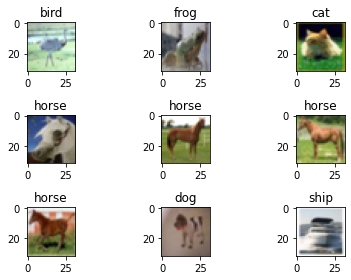

In [ ]:
# ----------- <Your code> ---------------
%matplotlib inline

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size = 9, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size = 9, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataiter = iter(train_loader)
images, labels = dataiter.next()

fig, axs = plt.subplots(3,3)

for i in range(3):
  for j in range(3):
    imshow(i, j, images[i*3 + j], classes[labels[i*3 + j].item()])

fig.tight_layout()
fig.show()

### Task 2: Create CNN and train it
Set up a convolutional neural network and have your data trained on it. You have to decide all the details in your network, overall your neural network should meet the following standards:


*   You should not use more than three convolutional layers and three fully connected layers
*   Accuracy on the test dataset should be **above** 50%



In [ ]:
# ----------- <Your code> ---------------
# You should have your test accuracy printed in the output box

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
    self.conv3 = nn.Conv2d(16, 32, kernel_size=5)
    self.fc1 = nn.Linear(32 * 1 * 1, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.pool = nn.MaxPool2d(2,2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 32 * 1 * 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))

    return F.log_softmax(x,-1) 

In [ ]:
cnn = CNN()
optimizer = optim.SGD(cnn.parameters(), lr=0.01, momentum=0.8)

In [ ]:
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(cnn, epoch)
  test(cnn, epoch)

Test result on epoch 1: Avg loss is 1.4813972724698483, Accuracy: 46.52000045776367%
Test result on epoch 2: Avg loss is 1.3651119564292953, Accuracy: 51.41999816894531%
Test result on epoch 3: Avg loss is 1.2748870805978776, Accuracy: 54.599998474121094%


### Task 3: Plot misclassified test images
Plot some misclassified images in your test dataset:

*   select three images that are **misclassified** by your neural network
*   label each images with true label and predicted label



['ship', 'plane', 'cat']


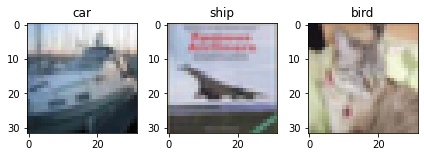

In [ ]:
# ----------- <Your code> ---------------
incorrect_images = []
incorrect_class = []
actual_label = []

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    
    for idx in range(len(labels)):
      if(labels[idx] != predicted[idx]):
        incorrect_images.append(images[idx])
        incorrect_class.append(predicted[idx])
        actual_label.append(labels[idx])


fig, (ax1, ax2, ax3) = plt.subplots(1,3)

def imshow(ax, img, label):
  img = img / 2 + 0.5
  ax.imshow(img.permute(1,2,0))
  ax.set_title(label)

imshow(ax1, incorrect_images[0], classes[incorrect_class[0].item()])
imshow(ax2, incorrect_images[1], classes[incorrect_class[1].item()])
imshow(ax3, incorrect_images[2], classes[incorrect_class[2].item()])

print([classes[actual_label[i].item()] for i in range(3)])
fig.tight_layout()
fig.show()

Questions (0 points): Are the mis-classified images also misleading to human eyes?

## Exercise 3: Transfer Learning (30 points)

In practice, people won't train an entire CNN from scratch, because it is relatively rare to have a dataset of sufficient size (or sufficient computational power). Instead, it is common to pretrain a CNN on a very large dataset and then use the CNN either as an initialization or a fixed feature extractor for the task of interest.

In this task, you will learn how to use a pretrained CNN for CIFAR-10 classification.

### Task1: Load pretrained model

`torchvision.models` (https://pytorch.org/vision/stable/models.html) contains definitions of models for addressing different tasks, including: image classification, pixelwise semantic segmentation, object detection, instance segmentation, person keypoint detection and video classification.

First, you should load the **pretrained** ResNet-18 that has already been trained on [ImageNet](https://www.image-net.org/) using `torchvision.models`. If you are interested in more details about Resnet-18, read this paper https://arxiv.org/pdf/1512.03385.pdf.

In [ ]:
# ----------- <Your code> ---------------
resnet18 = models.resnet18(pretrained = True)
resnet18 = resnet18.to(device)

### Task2: Create data loaders for CIFAR-10

Then you need to create a dataloader of CIFAR-10. Note that the model you load has been trained on **ImageNet** and it expects inputs as mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be **at least** 224. So you need to preprocess the CIFAR-10 data to make sure it has a height and width. See [`torchvision.transforms.Resize`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize).
You will probably want to add this transform appropriately to the `transform` you created in a previous task.


In [ ]:
# ----------- <Your code> ---------------
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                transforms.Resize((224,224))])

trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size = 9, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size = 9, shuffle = False, num_workers = 2)

Files already downloaded and verified
Files already downloaded and verified


### Task3: Classify test data on pretrained model

Use the model you load to classify the **test** CIFAR-10 data and print out the test accuracy.

Don't be surprised if the accuracy is bad!

In [ ]:
def train(classifier, epoch, lr):
  classifier.train()

  for batch_idx, (images, targets) in enumerate(train_loader):
    images = images.to(device)
    targets = targets.to(device)
    optimizer.zero_grad()
    output = classifier(images)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

def test(classifier, epoch):
  classifier.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      images = images.to(device)
      targets = targets.to(device)
      output = classifier(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      prediction = output.data.max(1, keepdim=True)[1]
      correct += prediction.eq(targets.data.view_as(prediction)).sum()
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

In [ ]:
# ----------- <Your code> ---------------
test_losses = []
test_counter = []

epoch = 3
for i in range(1, epoch+1):
  test(resnet18, i)

Test result on epoch 1: Avg loss is 0.7757909239396453, Accuracy: 0.029999999329447746%
Test result on epoch 2: Avg loss is 0.7757909239396453, Accuracy: 0.029999999329447746%
Test result on epoch 3: Avg loss is 0.7757909239396453, Accuracy: 0.029999999329447746%


### Task 4: Update model for CIFAR-10

Now try to improve the test accuracy. We offer several possible solutions:

(1) You can try to directly continue to train the model you load with the CIFAR-10 training data. 

(2) For efficiency, you can try to freeze part of the parameters of the loaded models. For example, you can first freeze all parameters by

```
for param in model.parameters():
    param.requires_grad = False
```
and then unfreeze the last few layers by setting `somelayer.requires_grad=True`.

You are also welcome to try any other approach you can think of.


**Note:** You should print out the test accuracy and to get full credits, the test accuracy should be at least **80%**.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.01, momentum=0.8)

In [ ]:
# ----------- <Your code> ---------------
test_losses = []
test_counter = []

epoch = 1
for i in range(1, epoch+1):
  train(resnet18, i, 0.01)
  test(resnet18, i)

Test result on epoch 1: Avg loss is -24.695160543060304, Accuracy: 90.57999420166016%
